### Submetric: Bridges 
Notebook by Elizabeth O'Connell

For my submetric I used a dataset which contained the bridges of Pittsburgh. We decided that a neighborhood with more bridges will be better connected which will cut down on commute distances and will be more walkable. Shorter commute distances and better walkability both contribute to our overall metric of which neighborhood is best enviromentally.

Below is the first five rows of the dataset:

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

bridges = pd.read_csv("pitt_bridges.csv")
bridges.head()

,_id,id,name,start_neighborhood,end_neighborhood,year_built,year_rehab,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2002832442,Fort Duquesne Blvd,Central Business District,NaN,NaN,NaN,NaN,Central Business District,6,2.0,42003020100,6.0,2.0,2.0,1-3,40.446450,-79.996537
1,2,761156487,28th Street Bridge,Strip District,Polish Hill,1931.0,1974.0,https://tools.wprdc.org/images/pittsburgh/brid...,Strip District,7,6.0,42003060500,6.0,6.0,2.0,2-25,40.456182,-79.973714
2,3,290122944,Second Avenue Bridge,Squirrel Hill South,Swisshelm Park,1886.0,1970.0,NaN,Swisshelm Park,5,14.0,42003141400,3.0,14.0,4.0,2-12,40.415210,-79.915699
3,4,1811170969,Alexander Street Bridge,West End,NaN,1924.0,2000.0,https://tools.wprdc.org/images/pittsburgh/brid...,West End,2,20.0,42003562600,5.0,20.0,6.0,1-17,40.440063,-80.033353
4,5,2047190591,Millvale Trail Pedestrian Bridge,Troy Hill,NaN,NaN,NaN,NaN,Troy Hill,1,24.0,42003240600,1.0,24.0,1.0,1-1,40.466586,-79.977731


#### Process
To determine the best neighborhood, I am looking for the neighborhood with the most bridges. In the dataset, each bridge has a start_neighborhood. If the bridge crosses over into another neighborhood, then it also has a end_neighborhood.

I created a dictionary to keep track of the bridge count of each neighborhood. I went through the start_neighborhood column first and then through the end_neighborhood column. For end_neighborhood, I did a check to make sure a value was not "NaN" before adding to the dictionary. I then plotted this data using a barchart and geopandas.

In [7]:
s = bridges['start_neighborhood']
s
count = dict()
for n in s:
    if n not in count:
        count[n] = 1
    else:
        count[n] = count[n] + 1
e = bridges['end_neighborhood']
for n in e:
    if type(n) == str:
        if n not in count:
            count[n] = 1
        else:
            count[n] = count[n] + 1
counts = pd.Series(count)
counts

Central Business District    13
Strip District                1
Squirrel Hill South          20
West End                      4
Troy Hill                     8
Brookline                     3
Overbrook                     5
Arlington                     2
Oakwood                       5
Bloomfield                    4
Greenfield                    3
Polish Hill                   5
Brighton Heights              3
Hays                          6
Beechview                     1
Banksville                    1
Shadyside                     8
Sheraden                      2
East Allegheny                4
Manchester                    1
Elliott                       2
Mount Washington              4
Larimer                       4
East Liberty                  2
Summer Hill                   1
Bon Air                       3
Bluff                         2
South Oakland                 8
Hazelwood                     5
Regent Square                 2
Squirrel Hill North           1
Allentow

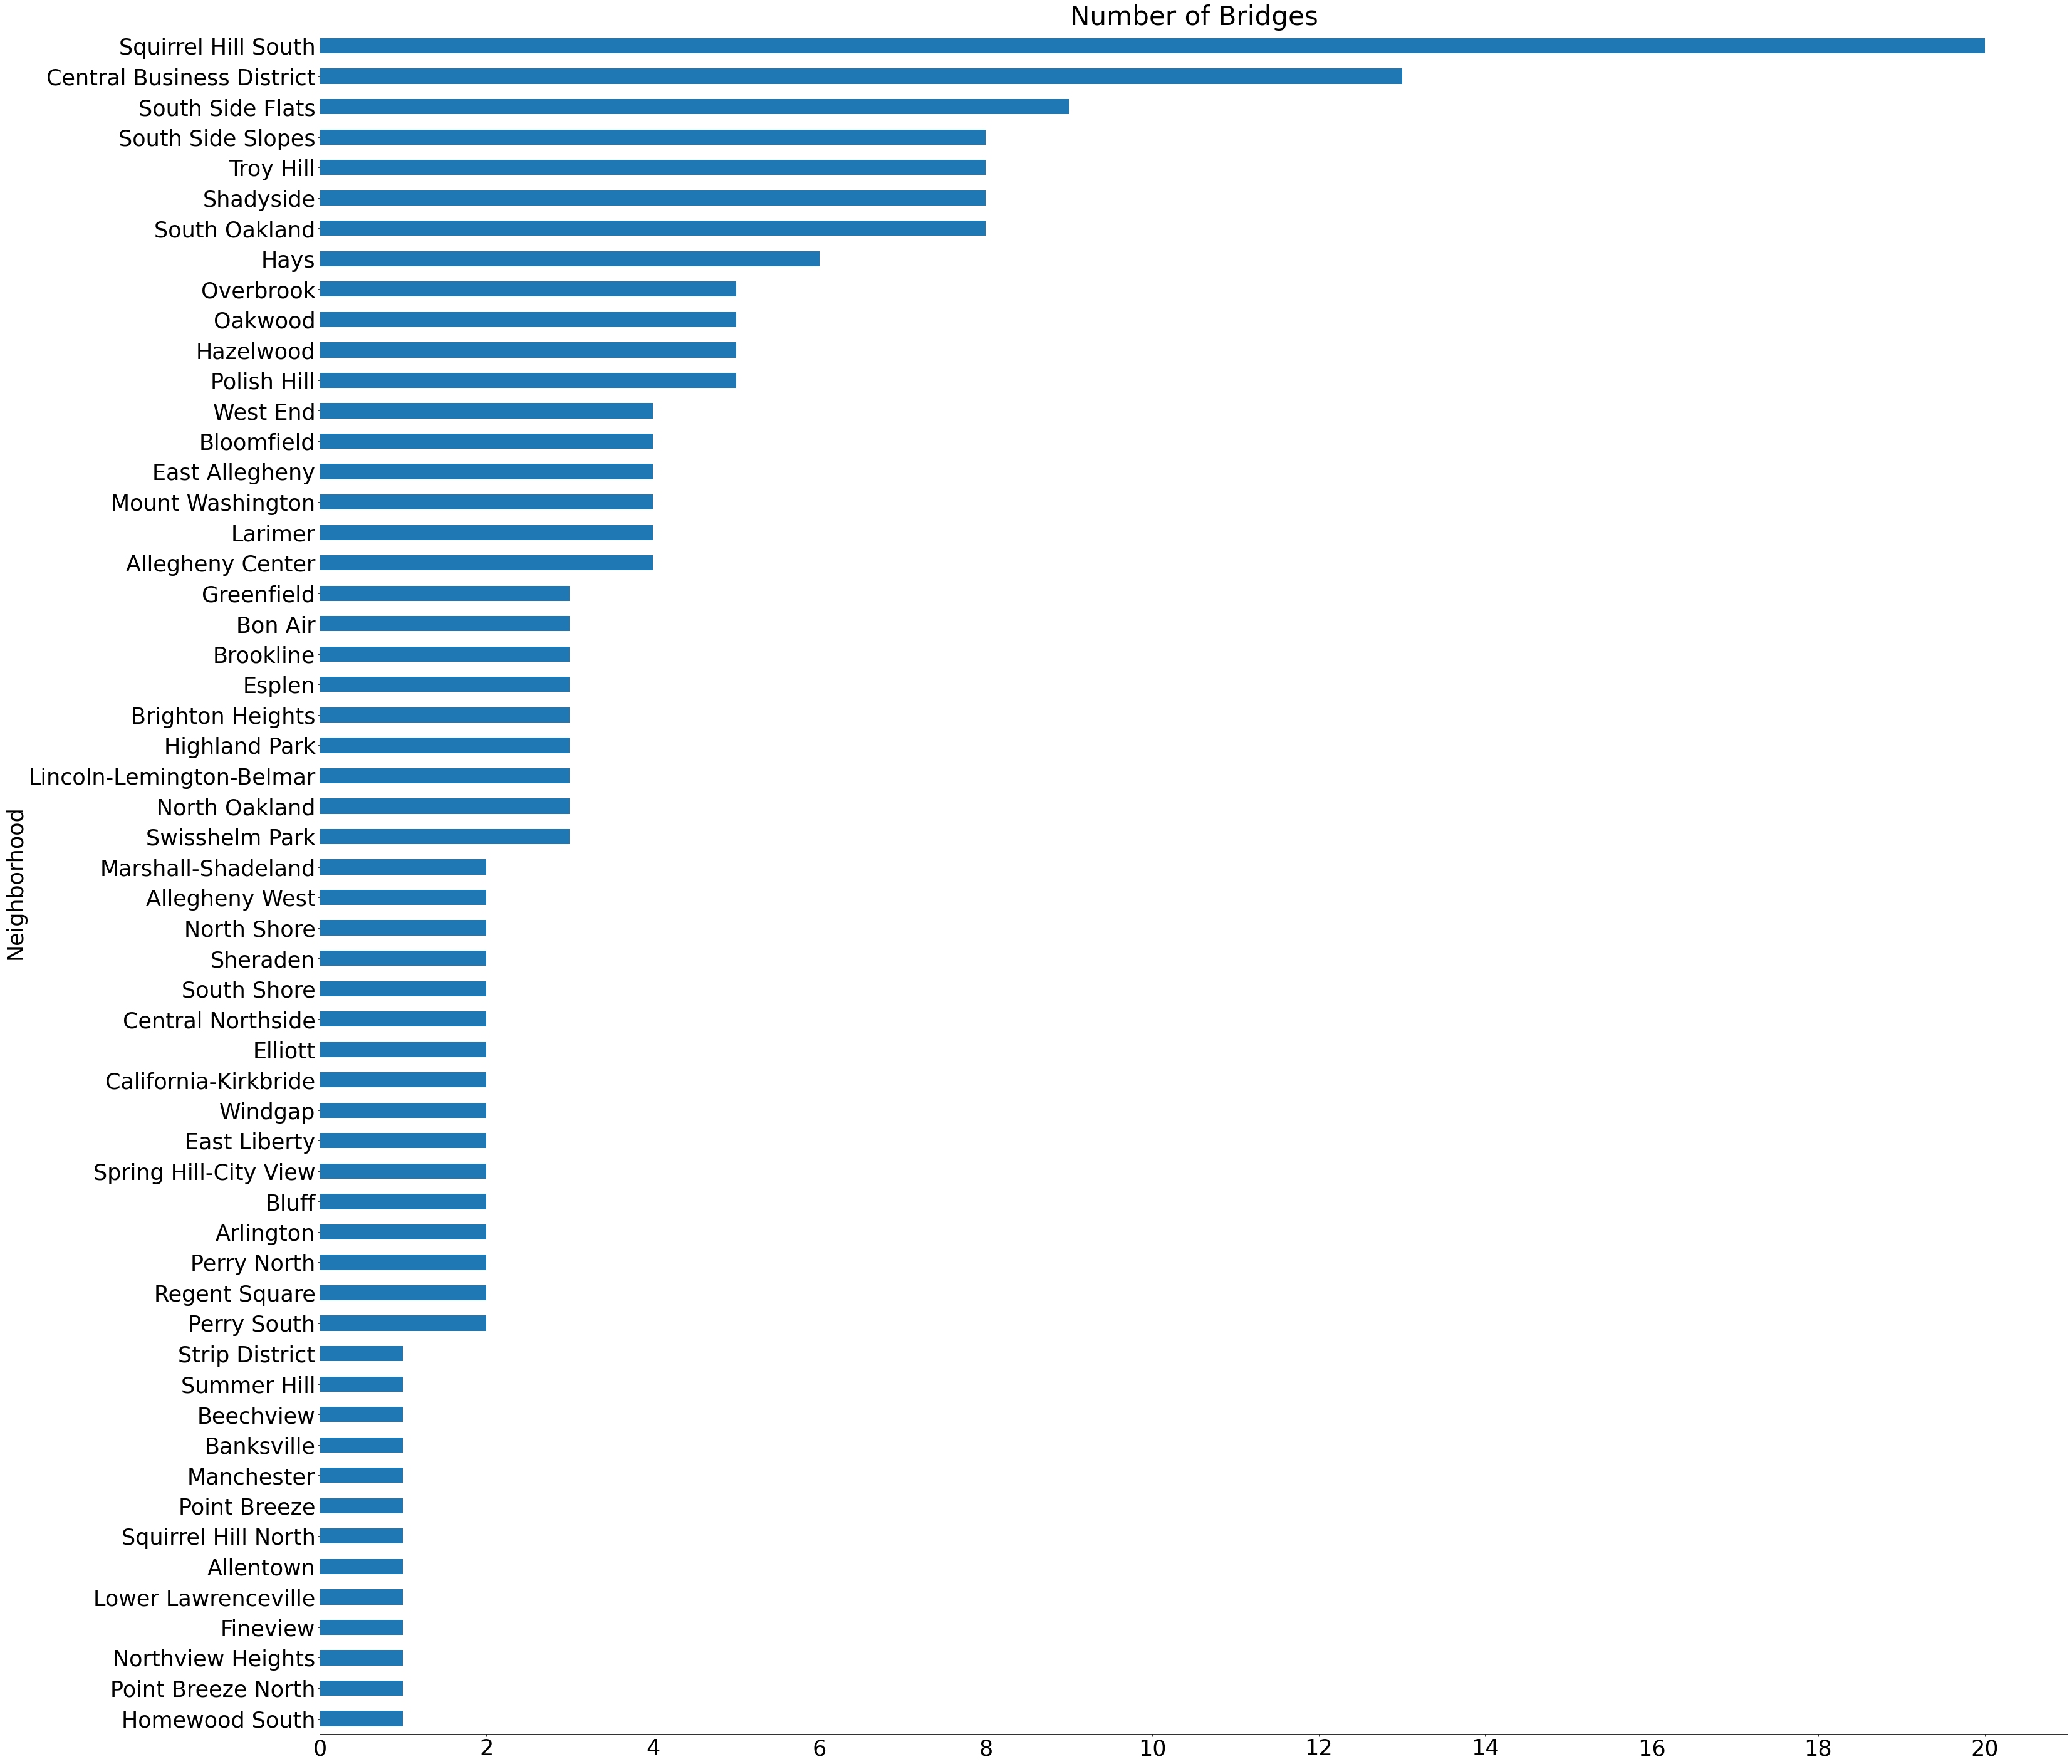

In [8]:
counts = counts.sort_values()
plt.rcParams.update({'font.size': 35})
counts.plot(kind='barh', title='Number of Bridges', ylabel="Count", xlabel="Neighborhood", figsize=(50, 50), xticks=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

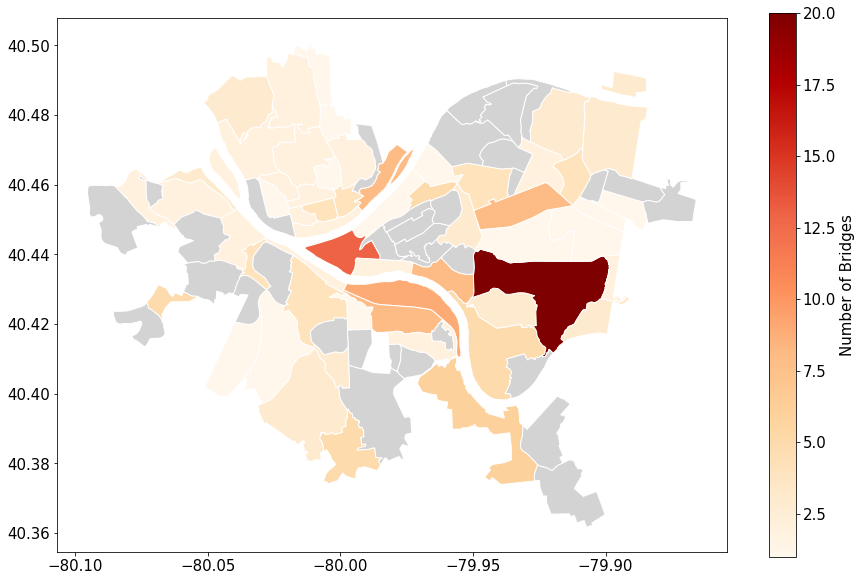

In [16]:
import geopandas
neighborhoods = geopandas.read_file("neighborhoods/Neighborhoods_.shp")
bridge_map = neighborhoods.merge(pd.DataFrame({'neighborhood': counts.index, 'count': counts}), how='left', left_on='hood', right_on='neighborhood')

plt.rcParams.update({'font.size': 15})
bridge_map.plot(column='count',
                cmap='OrRd',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Number of Bridges"},
               figsize=(15, 10),
               missing_kwds={"color": "lightgrey"})

#### Neighborhood Rating
For rating, each neighborhood was given a score from 0-10. Neighborhoods with no bridges were assigned 0. I applied a simple algorithm to get the ratings of neighborhoods that did have bridges.

In [19]:
n_df = pd.read_csv("pitt_neighborhoods.csv")
hoods = n_df['hood']
rating = dict()
for neigh in hoods:
    if neigh in counts:
        rating[neigh] = counts[neigh]/2
    else:
        rating[neigh] = 0
        
rating = pd.Series(rating)
rating = rating.sort_values(ascending=False)
rating

Squirrel Hill South          10.0
Central Business District     6.5
South Side Flats              4.5
Shadyside                     4.0
Troy Hill                     4.0
                             ... 
Beltzhoover                   0.0
Fairywood                     0.0
Mt. Oliver                    0.0
Chartiers City                0.0
Arlington Heights             0.0
Length: 90, dtype: float64


### Conclusion
After rating each neighborhood, I sorted the values and determined that the highest rated was Squirrel Hill South. Based on my limited knowledge of Pittsburgh neighborhoods, I would have rated Squirrel Hill high on my list of best neighborhoods, so I was happy to see that it came out on top. 

In second place was Downtown (Central Business District). This suprised me at first, but upon reflection this aligns well with my predictation that having more bridges contributes to shorter commute distances. Since Downtown is the center of Pittsburgh, it is very well connected.